# <font color="green">Merging Dataframes</font>

# Objectives of Merging DataFrames

Merging or combining DataFrames is a critical aspect of data manipulation and analysis in pandas. This process allows for the integration of related data from multiple sources into a single, cohesive dataset. Understanding the objectives and applications of different merging techniques is essential for effective data analysis. Below are the key objectives associated with merging DataFrames:

## DataFrames Concatenation

- **Objective**: To append one DataFrame to another along a particular axis (either rows or columns).
- **Usage**: This is particularly useful when you have data in similar structures that you want to compile into a single dataset. Concatenation is straightforward and does not require overlapping data between the DataFrames.



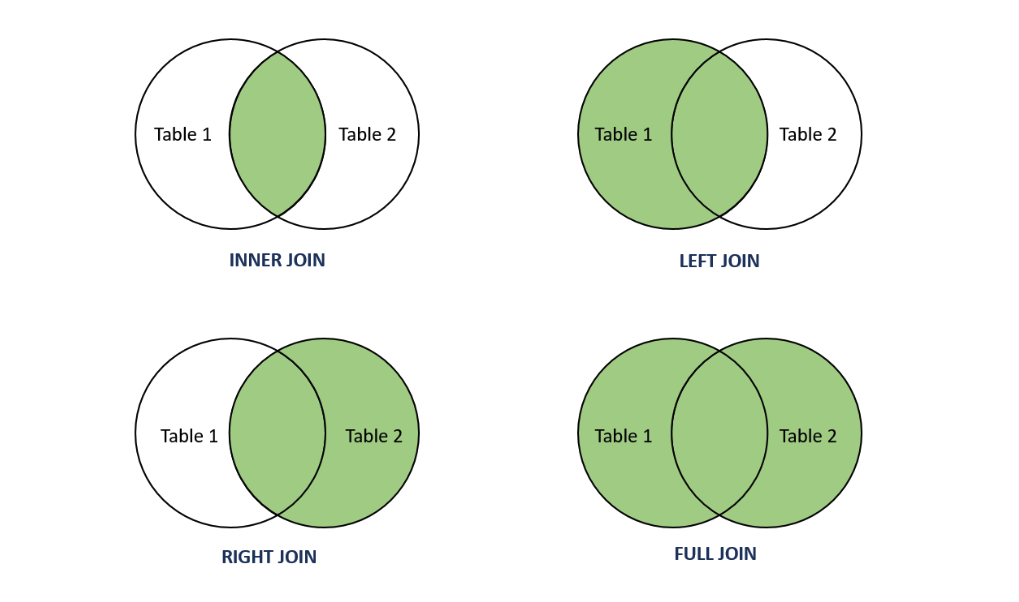

## DataFrames Inner Join

- **Objective**: To combine two DataFrames based on common keys, retaining only the rows that have matching values in both original datasets.
- **Usage**: This method is ideal for situations where you wish to merge data that shares a common identifier and you're only interested in observations present in both DataFrames. It ensures that the resulting DataFrame contains only the intersecting set of entries.

## DataFrames Right Join

- **Objective**: To merge two DataFrames using all keys from the right DataFrame and matching keys from the left DataFrame. If there is no match, the left side will contain null.
- **Usage**: This is useful when you want to ensure that all records from the right DataFrame are retained in the merge, filling in missing matches from the left DataFrame with NaNs. It is particularly helpful in cases where the right DataFrame holds a reference or a complete set of observations.

## DataFrames Left Join

- **Objective**: Similar to the right join, but in this case, all keys from the left DataFrame are retained, and matching keys from the right DataFrame are used to merge the data. Where there's no match, the right side will contain null.
- **Usage**: This approach is suitable when the left DataFrame contains a set of records you wish to preserve in the merge, filling in missing data from the right DataFrame where matches are found.

## DataFrames Outer/Full Join

- **Objective**: To merge two DataFrames using the union of keys from both DataFrames. This method ensures that all records from both DataFrames are included in the resulting dataset, filling in missing matches with NaNs.
- **Usage**: The outer join is ideal when you want a comprehensive merge that retains all entries from both DataFrames, providing a complete picture of the available data, even if it means including rows with missing data.

Each of these objectives caters to specific data manipulation needs, allowing for flexibility in how datasets are combined to facilitate thorough analysis.


In [17]:
import pandas as pd

#### Read the penguins_mini (as df1) and penguins_region (as df2) and check which columns and rows they have

In [18]:
df1 = pd.read_csv('./data/penguins_mini.csv')
df1

,species,island,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,181.0,3750.0,male
1,Adelie,Dream,178.0,3900.0,male
2,Gentoo,Biscoe,211.0,4500.0,female
3,Gentoo,Biscoe,230.0,5700.0,male
4,Chinstrap,Dream,192.0,3500.0,female


In [19]:
df2 = pd.read_csv('./data/penguins_region.csv')
df2

,species,region
0,Adelie,Anvers
1,King,Tierra del Fuego
2,Emperor,Weddell sea
3,Chinstrap,Anvers
4,Gentoo,Anvers
5,Little Blue,Roaring Forties


## 1. Concatenation


- **Functionality**: Concatenation is performed along a specified axis, with the option to apply set logic on the other axes. This allows for the vertical or horizontal merging of DataFrames, depending on the data organization and the desired outcome.

### Specifying the Axis

- **Vertical Concatenation (`axis=0`)**: When concatenating vertically, DataFrames are stacked on top of each other. This is the default behavior and is typically used when the DataFrames have the same columns but additional rows of data that you want to append.
  
- **Horizontal Concatenation (`axis=1`)**: In contrast, horizontal concatenation aligns DataFrames side by side, adding columns. This method is chosen when the DataFrames share the same rows (observations) but contain different sets of features or variables.

### Combining Multiple DataFrames

- Concatenation is not limited to two DataFrames; you can combine several DataFrames at once, provided they align correctly according to the specified axis.

### Key Parameters

- **`axis`**: Determines the direction of the concatenation. `axis=0` for vertical and `axis=1` for horizontal merging.
  
- **`ignore_index`**: When set to `True`, this parameter ignores the existing index labels and creates a new range of integer indices. This is particularly useful if the index does not carry meaningful information for the concatenated DataFrame or if you want to avoid duplicate indices.
  
- **`sort`**: This parameter controls whether to sort the columns if concatenating along `axis=0` (vertically) when the DataFrames have non-aligned columns. Sorting can help in identifying similar columns and aligning the data appropriately.

### Practical Use Cases

- **When `axis=0`**: This axis choice is most suitable for scenarios where DataFrames share the same columns but represent additional data points, such as new records or observations that should be appended below the existing ones.

- **When `axis=1`**: Choosing `axis=1` is appropriate for cases where the DataFrames hold different variables or features for the same observations. This expands the data's feature space horizontally by adding new columns.

Concatenating DataFrames along a specific axis, with careful consideration of parameters like `axis`, `ignore_index`, and `sort`, allows for flexible data manipulation. Whether integrating additional observations or expanding the dataset with new variables, concatenation is a powerful tool in the pandas library for structuring and analyzing data.


In [39]:
pd.concat([df1, df2]) # we are passing the dataframes as a list
# notice how the non existent columns in both dataframes are filled with null values
# notice how the index remains unchanged

,species,island,flipper_length_mm,body_mass_g,sex,region
0,Adelie,Torgersen,181.0,3750.0,male,NaN
1,Adelie,Dream,178.0,3900.0,male,NaN
2,Gentoo,Biscoe,211.0,4500.0,female,NaN
3,Gentoo,Biscoe,230.0,5700.0,male,NaN
4,Chinstrap,Dream,192.0,3500.0,female,NaN
0,Adelie,NaN,NaN,NaN,NaN,Ross Sea
1,King,NaN,NaN,NaN,NaN,Tierra del Fuego
2,Emperor,NaN,NaN,NaN,NaN,Weddell sea
3,Chinstrap,NaN,NaN,NaN,NaN,Tierra del Fuego
4,Gentoo,NaN,NaN,NaN,NaN,Palmer Archipelago


In [40]:
# axis=0

pd.concat([df1, df2], axis=0)

,species,island,flipper_length_mm,body_mass_g,sex,region
0,Adelie,Torgersen,181.0,3750.0,male,NaN
1,Adelie,Dream,178.0,3900.0,male,NaN
2,Gentoo,Biscoe,211.0,4500.0,female,NaN
3,Gentoo,Biscoe,230.0,5700.0,male,NaN
4,Chinstrap,Dream,192.0,3500.0,female,NaN
0,Adelie,NaN,NaN,NaN,NaN,Ross Sea
1,King,NaN,NaN,NaN,NaN,Tierra del Fuego
2,Emperor,NaN,NaN,NaN,NaN,Weddell sea
3,Chinstrap,NaN,NaN,NaN,NaN,Tierra del Fuego
4,Gentoo,NaN,NaN,NaN,NaN,Palmer Archipelago


#### Can I concat 3 dataframes?

In [59]:
penguin_sweet = {'species': ['Adelie', 'Gentoo', 'Chinstrap'], 
          'sweetness': ['sweet', 'sweeter', 'sweetest']}
df3 = pd.DataFrame(penguin_sweet)
df3

,species,sweetness
0,Adelie,sweet
1,Gentoo,sweeter
2,Chinstrap,sweetest


In [61]:
pd.concat([df1,df2,df3])

,species,island,flipper_length_mm,body_mass_g,sex,region,sweetness
0,Adelie,Torgersen,181.0,3750.0,male,NaN,NaN
1,Adelie,Dream,178.0,3900.0,male,NaN,NaN
2,Gentoo,Biscoe,211.0,4500.0,female,NaN,NaN
3,Gentoo,Biscoe,230.0,5700.0,male,NaN,NaN
4,Chinstrap,Dream,192.0,3500.0,female,NaN,NaN
0,Adelie,NaN,NaN,NaN,NaN,Ross Sea,NaN
1,King,NaN,NaN,NaN,NaN,Tierra del Fuego,NaN
2,Emperor,NaN,NaN,NaN,NaN,Weddell sea,NaN
3,Chinstrap,NaN,NaN,NaN,NaN,Tierra del Fuego,NaN
4,Gentoo,NaN,NaN,NaN,NaN,Palmer Archipelago,NaN


#### Adding Parameters

In [41]:
# notice how the index is now correct
# notice how the columns are sorted alphabetically and the rows are sorted according to first column

pd.concat([df1, df2], axis=0, ignore_index=True, sort=True)

,body_mass_g,flipper_length_mm,island,region,sex,species
0,3750.0,181.0,Torgersen,NaN,male,Adelie
1,3900.0,178.0,Dream,NaN,male,Adelie
2,4500.0,211.0,Biscoe,NaN,female,Gentoo
3,5700.0,230.0,Biscoe,NaN,male,Gentoo
4,3500.0,192.0,Dream,NaN,female,Chinstrap
5,NaN,NaN,NaN,Ross Sea,NaN,Adelie
6,NaN,NaN,NaN,Tierra del Fuego,NaN,King
7,NaN,NaN,NaN,Weddell sea,NaN,Emperor
8,NaN,NaN,NaN,Tierra del Fuego,NaN,Chinstrap
9,NaN,NaN,NaN,Palmer Archipelago,NaN,Gentoo


In [42]:
# axis=1
pd.concat([df1, df2], axis=1)

,species,island,flipper_length_mm,body_mass_g,sex,species,region
0,Adelie,Torgersen,181.0,3750.0,male,Adelie,Ross Sea
1,Adelie,Dream,178.0,3900.0,male,King,Tierra del Fuego
2,Gentoo,Biscoe,211.0,4500.0,female,Emperor,Weddell sea
3,Gentoo,Biscoe,230.0,5700.0,male,Chinstrap,Tierra del Fuego
4,Chinstrap,Dream,192.0,3500.0,female,Gentoo,Palmer Archipelago
5,NaN,NaN,NaN,NaN,NaN,Little Blue,Roaring Forties


# 2. Inner join

An inner join is a technique used to merge two DataFrames in a way that is analogous to relational database operations. This method is particularly useful for combining datasets that have a shared dimension, such as a common identifier or key. 


## Database-Style Inner Join

An inner join is a powerful method for merging DataFrames, mirroring the functionality found in SQL. It's designed to combine datasets based on shared keys, providing a streamlined way to integrate related information. Below we explore the mechanics and nuances of performing an inner join in pandas.

## Mechanism

- **How It Works**: The inner join operation aligns rows from two DataFrames based on common values in one or more shared columns. This approach is akin to an SQL inner join, where the resulting set comprises only those rows that have matching values in the join columns of both DataFrames.

## Common Column Requirement

- **Key Columns**: A prerequisite for an inner join is the presence of at least one column common to both DataFrames. This column, often referred to as the "join key," is crucial for the merge operation. The values within this key column are used to identify matching rows across the DataFrames.

## Characteristics of Inner Join

### Selective Inclusion

- **Matching Rows Only**: The essence of an inner join is its selectivity—only rows with matching keys in both DataFrames are included in the final result. Any row without a counterpart in the other DataFrame, based on the join column, is omitted. This ensures that the merged data is relevant and fully matched.

### Result Composition

- **Columns and Rows**: The resulting DataFrame from an inner join encompasses all columns from the original DataFrames. However, it selectively includes only those rows where the keys are present in both sources. This criterion guarantees that the information in the merged DataFrame is comprehensive and pertinent, reflecting a complete overlay of the data based on the specified keys.

The inner join stands out for its ability to ensure data integrity and relevance by focusing on commonalities between DataFrames. This method is indispensable for data analysts and scientists looking to consolidate and examine interconnected datasets thoroughly.


In [43]:
# method 1

pd.merge(df1, df2, how='inner', on='species')

,species,island,flipper_length_mm,body_mass_g,sex,region
0,Adelie,Torgersen,181.0,3750.0,male,Ross Sea
1,Adelie,Dream,178.0,3900.0,male,Ross Sea
2,Gentoo,Biscoe,211.0,4500.0,female,Palmer Archipelago
3,Gentoo,Biscoe,230.0,5700.0,male,Palmer Archipelago
4,Chinstrap,Dream,192.0,3500.0,female,Tierra del Fuego


In [45]:
# method 2

df1.merge(df2, how='inner', on='species')

,species,island,flipper_length_mm,body_mass_g,sex,region
0,Adelie,Torgersen,181.0,3750.0,male,Ross Sea
1,Adelie,Dream,178.0,3900.0,male,Ross Sea
2,Gentoo,Biscoe,211.0,4500.0,female,Palmer Archipelago
3,Gentoo,Biscoe,230.0,5700.0,male,Palmer Archipelago
4,Chinstrap,Dream,192.0,3500.0,female,Tierra del Fuego


In [53]:
pd.merge(df1, df2) # if there is only one common column, this will also work

,species,island,flipper_length_mm,body_mass_g,sex,region
0,Adelie,Torgersen,181.0,3750.0,male,Ross Sea
1,Adelie,Dream,178.0,3900.0,male,Ross Sea
2,Gentoo,Biscoe,211.0,4500.0,female,Palmer Archipelago
3,Gentoo,Biscoe,230.0,5700.0,male,Palmer Archipelago
4,Chinstrap,Dream,192.0,3500.0,female,Tierra del Fuego


## 3. Right join



A right join is a specialized merge operation within pandas, designed to combine two DataFrames based on a shared column or columns. This method is akin to a right join in SQL, prioritizing the inclusion of all rows from the right DataFrame. Here’s a detailed exploration of the right join's mechanics and its role in data manipulation.

## Database-Style Right Join

- **Mechanism**: In a right join, the rows of two DataFrames are merged based on common values found in their shared columns. The key feature of a right join is its emphasis on the right DataFrame, ensuring every row from the right side is included in the final merged DataFrame.

## Common Column Requirement

- **Key Columns**: Essential to the operation of a right join is the existence of at least one shared column between the DataFrames. This shared column serves as the join key, guiding pandas on how to align matching rows from each DataFrame.

## Characteristics of Right Join

### Inclusive of Right DataFrame

- **Complete Inclusion**: The defining aspect of a right join is that all rows from the right DataFrame are retained in the merged result. This ensures no data from the right DataFrame is lost, regardless of whether matching rows exist in the left DataFrame.

### Handling Missing Matches

- **Filling with Nulls**: When rows in the right DataFrame do not find a corresponding match in the left DataFrame, the resulting DataFrame will still include these rows. However, the columns from the left DataFrame that lack matching entries will be filled with null values (typically `NaN` in pandas). This approach maintains the integrity of the right DataFrame's data while clearly indicating where matches are not found.

A right join is invaluable for scenarios where preserving the entirety of the right DataFrame is crucial, even when exact matches are not found in the left DataFrame. It provides a comprehensive way to merge datasets, ensuring that all data from the right side is considered during analysis.


In [46]:
# method 1

pd.merge(right=df1, left=df2, how='right', on='species')

,species,region,island,flipper_length_mm,body_mass_g,sex
0,Adelie,Ross Sea,Torgersen,181.0,3750.0,male
1,Adelie,Ross Sea,Dream,178.0,3900.0,male
2,Gentoo,Palmer Archipelago,Biscoe,211.0,4500.0,female
3,Gentoo,Palmer Archipelago,Biscoe,230.0,5700.0,male
4,Chinstrap,Tierra del Fuego,Dream,192.0,3500.0,female


In [47]:
# method 2

# notice how the order in this syntax is important!!!

df2.merge(df1, how='right', on='species')

,species,region,island,flipper_length_mm,body_mass_g,sex
0,Adelie,Ross Sea,Torgersen,181.0,3750.0,male
1,Adelie,Ross Sea,Dream,178.0,3900.0,male
2,Gentoo,Palmer Archipelago,Biscoe,211.0,4500.0,female
3,Gentoo,Palmer Archipelago,Biscoe,230.0,5700.0,male
4,Chinstrap,Tierra del Fuego,Dream,192.0,3500.0,female


## 4. Left Join



A left join is an essential merge operation in pandas, enabling the combination of two DataFrames based on a shared column, with a specific focus on retaining all rows from the left DataFrame. This method is reflective of a left join in SQL, where the priority is given to the left side of the join, ensuring no data from the left DataFrame is omitted, even if there are no matching rows in the right DataFrame. Here's an in-depth look at the left join process and its significance.

## Database-Style Left Join

- **Mechanism**: In a left join, rows from two DataFrames are merged together based on common values found in their shared columns. The distinctive characteristic of a left join is its emphasis on the left DataFrame, guaranteeing the inclusion of every row from the left in the final merged DataFrame.

## Common Column Requirement

- **Key Columns**: A critical prerequisite for conducting a left join is the existence of at least one column common to both DataFrames. This column acts as the join key, enabling pandas to determine how to align matching rows across the two DataFrames.

## Characteristics of Left Join

### Comprehensive Inclusion of Left DataFrame

- **All Rows Included**: The hallmark of a left join is the complete retention of all rows from the left DataFrame in the merged output. This approach ensures that the entirety of the left DataFrame's data is preserved in the resulting dataset.

### Addressing Missing Matches

- **Null Filling**: When the left DataFrame contains rows that do not have corresponding matches in the right DataFrame, these rows are still included in the merged DataFrame. However, for columns coming from the right DataFrame where no matches are found, the entries are filled with null values (`NaN` in pandas). This method maintains the full dataset from the left side while indicating the absence of matching data from the right side.

The left join operation is crucial for situations where it's important to maintain all records from the left DataFrame, accommodating the inclusion of unmatched data by filling missing values with nulls. It offers a methodical approach to data merging, ensuring comprehensive data analysis and integrity.


In [48]:
# method 1

pd.merge(right=df1, left=df2, how='left', on='species')

,species,region,island,flipper_length_mm,body_mass_g,sex
0,Adelie,Ross Sea,Torgersen,181.0,3750.0,male
1,Adelie,Ross Sea,Dream,178.0,3900.0,male
2,King,Tierra del Fuego,NaN,NaN,NaN,NaN
3,Emperor,Weddell sea,NaN,NaN,NaN,NaN
4,Chinstrap,Tierra del Fuego,Dream,192.0,3500.0,female
5,Gentoo,Palmer Archipelago,Biscoe,211.0,4500.0,female
6,Gentoo,Palmer Archipelago,Biscoe,230.0,5700.0,male
7,Little Blue,Roaring Forties,NaN,NaN,NaN,NaN


In [50]:
# method 2

df2.merge(df1, how='left', on='species')

,species,region,island,flipper_length_mm,body_mass_g,sex
0,Adelie,Ross Sea,Torgersen,181.0,3750.0,male
1,Adelie,Ross Sea,Dream,178.0,3900.0,male
2,King,Tierra del Fuego,NaN,NaN,NaN,NaN
3,Emperor,Weddell sea,NaN,NaN,NaN,NaN
4,Chinstrap,Tierra del Fuego,Dream,192.0,3500.0,female
5,Gentoo,Palmer Archipelago,Biscoe,211.0,4500.0,female
6,Gentoo,Palmer Archipelago,Biscoe,230.0,5700.0,male
7,Little Blue,Roaring Forties,NaN,NaN,NaN,NaN


#### Using `indicator=True` to check how the dataframes were merged and if it corresponds to your expectations

In [62]:
df2.merge(df1, how='left', on='species', indicator=True)

,species,region,island,flipper_length_mm,body_mass_g,sex,_merge
0,Adelie,Ross Sea,Torgersen,181.0,3750.0,male,both
1,Adelie,Ross Sea,Dream,178.0,3900.0,male,both
2,King,Tierra del Fuego,NaN,NaN,NaN,NaN,left_only
3,Emperor,Weddell sea,NaN,NaN,NaN,NaN,left_only
4,Chinstrap,Tierra del Fuego,Dream,192.0,3500.0,female,both
5,Gentoo,Palmer Archipelago,Biscoe,211.0,4500.0,female,both
6,Gentoo,Palmer Archipelago,Biscoe,230.0,5700.0,male,both
7,Little Blue,Roaring Forties,NaN,NaN,NaN,NaN,left_only


## 5. Outer/Full Join



An outer join, also known as a full join, is a comprehensive merge operation used in pandas to combine two DataFrames. This operation is based on a shared column, aiming to retain all rows from both DataFrames, not just those with matching keys. It mirrors the concept of an outer join in SQL, ensuring no data is excluded from either DataFrame, even in the absence of matching rows. Here we delve into the specifics of an outer join and its application.

## Database-Style Outer Join

- **Mechanism**: The outer join operation merges rows from two DataFrames based on common values in one or more shared columns. Its defining feature is the inclusion of all rows from both the left and right DataFrames, making it the most inclusive type of join.

## Common Column Requirement

- **Key Columns**: For an outer join to be performed, there must be at least one column common to both DataFrames. This shared column, or columns, serves as the join key, guiding pandas on how to align rows from each DataFrame.

## Characteristics of Outer Join

### Inclusion of All Rows

- **Comprehensive Merging**: Unlike inner, left, or right joins that may exclude some rows based on the presence or absence of matching data, an outer join ensures the inclusion of all rows from both DataFrames. This approach guarantees that no data is left behind, providing a complete picture of the merged datasets.

### Handling Missing Data

- **Null Value Filling**: When there are rows in one DataFrame that do not find corresponding matches in the other, these rows are still included in the resulting DataFrame. To address the lack of matching data, columns from the DataFrame without matching rows are filled with null values (`NaN` in pandas). This is true for both sides of the join, ensuring that the dataset remains comprehensive even when exact matches are not found.

The outer join is an invaluable tool in data analysis, especially when working with datasets that require a full overview without losing any data due to non-matching keys. It allows analysts to combine disparate datasets into a single DataFrame, where the absence of matching information is clearly indicated through null values, facilitating further analysis or data cleaning.


In [51]:
# method 1

pd.merge(right=df1, left=df2, how='outer', on='species')

,species,region,island,flipper_length_mm,body_mass_g,sex
0,Adelie,Ross Sea,Torgersen,181.0,3750.0,male
1,Adelie,Ross Sea,Dream,178.0,3900.0,male
2,King,Tierra del Fuego,NaN,NaN,NaN,NaN
3,Emperor,Weddell sea,NaN,NaN,NaN,NaN
4,Chinstrap,Tierra del Fuego,Dream,192.0,3500.0,female
5,Gentoo,Palmer Archipelago,Biscoe,211.0,4500.0,female
6,Gentoo,Palmer Archipelago,Biscoe,230.0,5700.0,male
7,Little Blue,Roaring Forties,NaN,NaN,NaN,NaN


In [55]:
# sort=True will sort the rows on the spice column alphabetically 

pd.merge(right=df1, left=df2, how='outer', on='species', sort=True)

,species,region,island,flipper_length_mm,body_mass_g,sex
0,Adelie,Ross Sea,Torgersen,181.0,3750.0,male
1,Adelie,Ross Sea,Dream,178.0,3900.0,male
2,Chinstrap,Tierra del Fuego,Dream,192.0,3500.0,female
3,Emperor,Weddell sea,NaN,NaN,NaN,NaN
4,Gentoo,Palmer Archipelago,Biscoe,211.0,4500.0,female
5,Gentoo,Palmer Archipelago,Biscoe,230.0,5700.0,male
6,King,Tierra del Fuego,NaN,NaN,NaN,NaN
7,Little Blue,Roaring Forties,NaN,NaN,NaN,NaN


In [56]:
# method 2

df1.merge(df2, how='outer', on='species')

,species,island,flipper_length_mm,body_mass_g,sex,region
0,Adelie,Torgersen,181.0,3750.0,male,Ross Sea
1,Adelie,Dream,178.0,3900.0,male,Ross Sea
2,Gentoo,Biscoe,211.0,4500.0,female,Palmer Archipelago
3,Gentoo,Biscoe,230.0,5700.0,male,Palmer Archipelago
4,Chinstrap,Dream,192.0,3500.0,female,Tierra del Fuego
5,King,NaN,NaN,NaN,NaN,Tierra del Fuego
6,Emperor,NaN,NaN,NaN,NaN,Weddell sea
7,Little Blue,NaN,NaN,NaN,NaN,Roaring Forties


In [57]:
df1.merge(df2, how='outer', on='species', sort=True)

,species,island,flipper_length_mm,body_mass_g,sex,region
0,Adelie,Torgersen,181.0,3750.0,male,Ross Sea
1,Adelie,Dream,178.0,3900.0,male,Ross Sea
2,Chinstrap,Dream,192.0,3500.0,female,Tierra del Fuego
3,Emperor,NaN,NaN,NaN,NaN,Weddell sea
4,Gentoo,Biscoe,211.0,4500.0,female,Palmer Archipelago
5,Gentoo,Biscoe,230.0,5700.0,male,Palmer Archipelago
6,King,NaN,NaN,NaN,NaN,Tierra del Fuego
7,Little Blue,NaN,NaN,NaN,NaN,Roaring Forties
